# exploratory data analysis dalam data StudentInfo OULAD dataset

keterangan :
    This file contains demographic information about the students together with their results. File contains the following columns:

    code_module – an identification code for a module on which the student is registered.
    code_presentation - the identification code of the presentation during which the student is registered on the module.
    id_student – a unique identification number for the student.
    gender – the student’s gender.
    region – identifies the geographic region, where the student lived while taking the module-presentation.
    highest_education – highest student education level on entry to the module presentation.
    imd_band – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
    age_band – band of the student’s age.
    num_of_prev_attempts – the number times the student has attempted this module.
    studied_credits – the total number of credits for the modules the student is currently studying.
    disability – indicates whether the student has declared a disability.
    final_result – student’s final result in the module-presentation.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

code exploratory menggunakan library os dan menggunakan modifikasi dari pandas read csv untuk mendapatkan jumlah baris, kolom, tipe data, dan missing value

In [3]:
def Load_File(path) :
    if os.path.isfile(path) :
        data = pd.read_csv(path)
        data = data.replace('?', np.nan)
        print("\n" + "banyaknya baris adalah %s" % len(data))
        print("banyaknya kolom adalah %s" % len(data.columns) + "\n")
        print("tipe data :- ")
        print(data.dtypes)
        print("Missing value (null):- ")
        print(data.isnull().sum())
        
        return data
    else:
        print(path + " tidak ada")

In [4]:
df = Load_File(r'C:\Users\Kouma\Datasets\studentInfo.csv')


banyaknya baris adalah 32593
banyaknya kolom adalah 12

tipe data :- 
code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object
Missing value (null):- 
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64


In [5]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


# Preprocessing

dari summary diatas didapatkan missing value dari imd_band dan bisa dilakukan pengecekan

In [7]:
uniqueValues = df['imd_band'].unique()
print(uniqueValues)

['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20' '0-10%']


mengganti value '10-20' menjadi persentasi

In [8]:
df['imd_band'] = df['imd_band'].replace(['10-20'], '10-20%')
uniqueValues = df['imd_band'].unique()
print(uniqueValues)

['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20%' '0-10%']


missing values dapat diganti dengan mode
(The mode of a set of values is the value that appears most often)

In [10]:
df['imd_band'] = df['imd_band'].fillna(df['imd_band'].mode()[0])

In [12]:
df.isnull().any()

code_module             False
code_presentation       False
id_student              False
gender                  False
region                  False
highest_education       False
imd_band                False
age_band                False
num_of_prev_attempts    False
studied_credits         False
disability              False
final_result            False
dtype: bool

In [22]:
df['studied_credits'].unique()

array([240,  60, 120,  90, 150, 180, 345, 420, 170,  80,  75, 300, 330,
       210, 270, 360, 135,  70, 225, 585, 325, 130, 195, 105, 655, 165,
       100, 390, 220, 160, 250,  30,  40,  45, 400, 235, 145, 630, 355,
        50, 110, 115,  55,  85, 480, 280, 175,  95, 155, 190, 315, 200,
       140, 540, 310, 370, 205, 215, 255,  65, 430], dtype=int64)

<AxesSubplot:xlabel='final_result'>

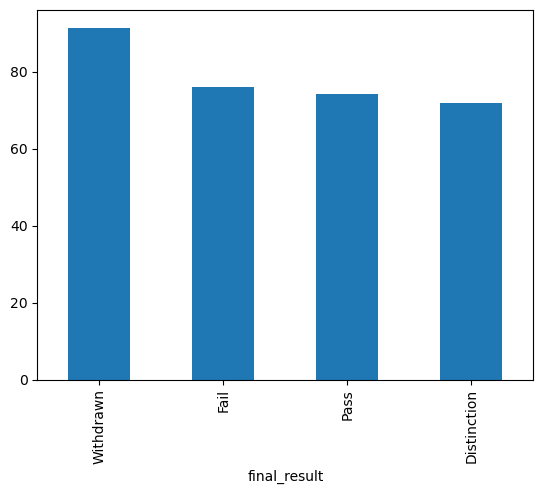

In [25]:
plt.figure()
df.groupby(['final_result'])['studied_credits'].mean().sort_values(ascending = False).plot(kind='bar')

dari chart diatas saya ingin mencoba menemukan korelasi dari rata-rata studi yang ditempuh dengan hasil akhir